In [2]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
102585,102585,sell,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,NaN,NaN,...,70.0,1000.000000,1571.428571,NaN,NaN,NaN,http://www.properati.com.ar/1bqsa_venta_ph_mar...,PH UNICO MEDIA CUADRA DEL MAR AL FONDO TIPO CH...,PH - La Perla Norte,https://thumbs4.properati.com/5/c52R9ghZeFgRMw...
3422,3422,sell,apartment,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|,Argentina,Bs.As. G.B.A. Zona Oeste,3430550.0,"-34.65460968,-58.78455734",-34.654610,...,1.0,NaN,NaN,4.0,1.0,NaN,http://www.properati.com.ar/15l54_venta_depart...,XINTEL(LIS-LCI-144) Venta Departamento de 3 am...,U$D 110.000 - Departamento en Venta - Del Vall...,https://thumbs4.properati.com/0/4NjtHlfrewaZkR...
56232,56232,sell,apartment,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.6171222,-58.467658",-34.617122,...,41.0,2267.471765,50291.170732,NaN,NaN,NaN,http://www.properati.com.ar/19qfx_venta_depart...,"Venta de Departamento 3 AMBIENTES en FLORES, C...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/8/YR7TABIBR7LC8Q...
110385,110385,sell,apartment,Constitución,|Argentina|Capital Federal|Constitución|,Argentina,Capital Federal,3435257.0,"-34.6262089,-58.384167",-34.626209,...,26.0,1500.000000,1500.000000,NaN,1.0,NaN,http://www.properati.com.ar/1c3le_venta_depart...,"Departamento MONOAMBIENTE, divido muy luminoso...",MUY LUMINOSO // PAVON 1300,https://thumbs4.properati.com/8/uy-6EOXt2qo8U6...
70130,70130,sell,apartment,Remedios de Escalada,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Remedi...,Argentina,Bs.As. G.B.A. Zona Sur,3429582.0,NaN,NaN,...,66.0,1577.464789,1696.969697,NaN,NaN,NaN,http://www.properati.com.ar/1aj4i_venta_depart...,Muy buen depto de 3 dormitorios a 1 cuadra de ...,3 dormitorios a mts de la Avda.,https://thumbs4.properati.com/2/rFxYaWQzwEKpLu...
24116,24116,sell,house,Capitán Bermúdez,|Argentina|Santa Fe|Capitán Bermúdez|,Argentina,Santa Fe,3862738.0,"-32.8233849,-60.710477",-32.823385,...,80.0,1000.000000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/17nk1_venta_casa_c...,Brasil 360 (Capitán Bermúdez)Casa inmaculada d...,Casa perfecta!,https://thumbs4.properati.com/1/Rle4oZ81CvFxzi...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
# Columna price_aprox_usd: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_aprox_usd.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_usd.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_usd']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_usd  count
0                 0.00      1
1              4666.62      1
2              4952.45      1
3              5000.00      2
4              5047.53      5
...                ...    ...
10359      16000000.00      1
10360      19500000.00      1
10361      22980378.29      1
10362      25000000.00      1
10363      46545445.00      1

[10364 rows x 2 columns]


<AxesSubplot:xlabel='property_type'>

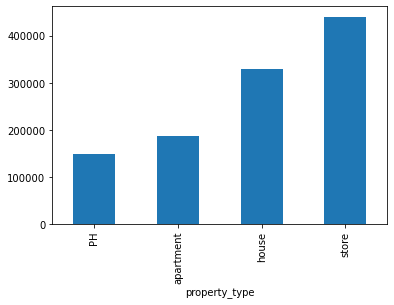

In [5]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de precios. En esta grafica podemos observar la variación en la media de los precios que existe de acuerdo al tipo de vivienda.
data.groupby('property_type')['price_aprox_usd'].mean().plot.bar()

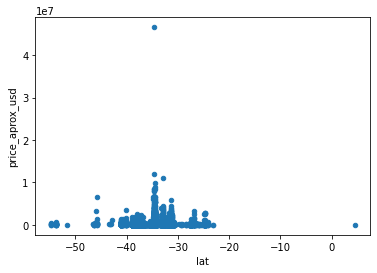

In [92]:
#graficamos un plot para visualizar la dispersión de los precios en dolares por latitud 
# y observamos como los valores extremos se ubican en la latitud cercana a -35
my_plot_precios_aprox_usd = data.plot("lat", "price_aprox_usd", kind="scatter")
plt.show()

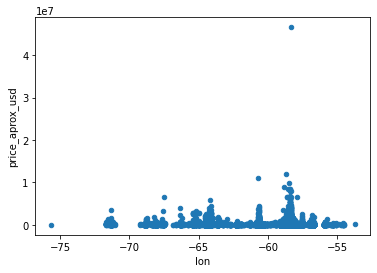

In [93]:
#graficamos un plot para visualizar la dispersión de los precios en dolares por longitud 
# y observamos como los valores extremos y una gran variedad de precios se ubican en la latitud cercana a -58
my_plot_precios_aprox_usd = data.plot("lon", "price_aprox_usd", kind="scatter")
plt.show()

In [6]:
data.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

### Detalle de análisis de columna `price_aprox_usd`:

* `price_aprox_usd` -> Esta columna tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, teniendo en cuenta que el valor por metro cuadrado cubierto y total estan calculados en esta moneda, observamos un valor máximo de 46,545,445 alejado significativamente de la media que es de 239,700.
Esta columna podriamos completarla realizando diferentes operaciones:
 
1. Extrayendo este dato de las columnas description y title
2. Diviendo el precio total en usd por el precio del metro cuadrado

### Detalle de valores extremos en la  columna `price_aprox_usd`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencias valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

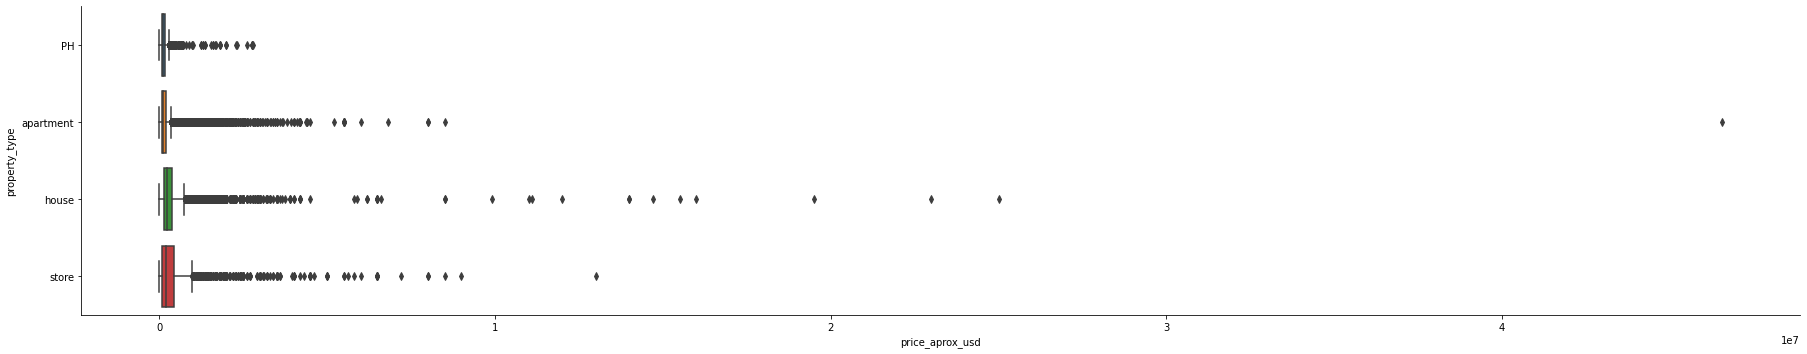

In [7]:
sns.catplot(data=data, x= 'price_aprox_usd', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `price_aprox_USD`:

Vamos a extraer datos de las columnas title y description para esto tomamos las diferentes expresiones de la moneda U$D, USD, usd, us$, U$S

In [8]:
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

#Que pasa si la propiedad vale más de 4 digitos? el valor minimo de propiedad lleno es de 4,666.62 usd, trae tambien el dato dolares y debemos cambiar . por ,

patron = r'U\$D\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|USD\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|usd\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|us\$d\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|U\$S\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)'

regex = re.compile(patron, flags = re.IGNORECASE)

precio_aprox_usd_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_titulo, inplace=True)

precio_aprox_usd_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_descripcion, inplace=True)


In [84]:
precio_aprox_usd_descripcion.values

array([nan, ('20.000', '', '', '', ''), nan, ...,
       ('', '20.000', '', '', ''), ('', '', '', '', '95.900'), nan],
      dtype=object)

In [83]:
data.price_aprox_usd.sample(50)

#precio_aprox_usd_descripcion.dtype(object)

58382       92000.00
66885       60000.00
58250      239000.00
36929      596081.00
58571       75000.00
34474      450000.00
32701      135000.00
78238      155000.00
19256      220000.00
28020      130000.00
104163           NaN
80678      125000.00
17851            NaN
66770       92000.00
114149     165000.00
90565      159000.00
111689      90575.13
45836      100000.00
109640     120000.00
117273           NaN
26530      587600.00
25051     2600000.00
38738      165000.00
49225      495000.00
33483      140000.00
50413       70104.59
36103       49353.63
40556     1380000.00
109466           NaN
33260      370000.00
112421     260000.00
8377       420000.00
11546       89000.00
30624      228150.00
50230      390000.00
64907      405000.00
89018      790000.00
26091       37000.00
31145       98000.00
51448      240000.00
64948            NaN
73085      380000.00
39756            NaN
64593      134680.00
107854     250000.00
6972       125000.00
79105      550000.00
15430      10

In [10]:
#luego de aplicar el regex se logran recucir el porcentaje de nans al pasar del 16.84% al 14.029%
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_usd.isna().sum()/data.price_aprox_usd.shape[0]*100}')
print (f'entradas: {data.price_aprox_usd.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 14.02986305890117
entradas: 121220


In [11]:
#Vamos a transformar los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['price_aprox_usd'] = pd.to_numeric(data['price_aprox_usd'],errors = 'coerce')

In [12]:
print (f'% de valores nulos que quedan luego de aplicar regex: {data.price_aprox_usd.isna().sum()/data.price_aprox_usd.shape[0]*100}')
print (f'entradas: {data.price_aprox_usd.shape[0]}')

% de valores nulos que quedan luego de aplicar regex: 16.837155584886982
entradas: 121220
